# Exploratory Data Analysis

In [1]:
import pandas as pd
pd.set_option('display.max_rows', 100)
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

#from fuzzywuzzy import fuzz, process

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import preprocessing  # Own preprocessing function
import importlib
#importlib.reload(preprocessing)


# color pallette
CNF = '#393e46' # confirmed - grey
DTH = '#ff2e63' # death - red
REC = '#21bf73' # recovered - cyan
ACT = '#fe9801' # active case - yellow

In [31]:
importlib.reload(preprocessing)

<module 'preprocessing' from '/Users/stb/Documents/GitHub/covid-19/preprocessing.py'>

## Import

### df

In [2]:
# Read COVID data
df = preprocessing.get_data(date_="03-20-2020", time_series=True, population=True)

In [3]:
df.head()

,Country/Region,Date,Confirmed,Deaths,Recovered,Country,Active,Population,ISO3_Code,Income,Confirmed_per_Cap,Deaths_per_Cap,Recovered_per_Cap,Active_per_Cap
0,Afghanistan,2020-01-22,0,0,0,Afghanistan,0,38.928341,AFG,Low-income countries,0.0,0.0,0.0,0.0
1,Albania,2020-01-22,0,0,0,Albania,0,2.877800,ALB,Upper-middle-income countries,0.0,0.0,0.0,0.0
2,Algeria,2020-01-22,0,0,0,Algeria,0,43.851043,DZA,Upper-middle-income countries,0.0,0.0,0.0,0.0
3,Andorra,2020-01-22,0,0,0,Andorra,0,0.077265,AND,High-income countries,0.0,0.0,0.0,0.0
4,Angola,2020-01-22,0,0,0,Angola,0,32.866268,AGO,Lower-middle-income countries,0.0,0.0,0.0,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10431 entries, 0 to 10430
Data columns (total 14 columns):
Country/Region       10431 non-null object
Date                 10431 non-null datetime64[ns]
Confirmed            10431 non-null int64
Deaths               10431 non-null int64
Recovered            10431 non-null int64
Country              10431 non-null object
Active               10431 non-null int64
Population           9943 non-null float64
ISO3_Code            9943 non-null object
Income               9943 non-null object
Confirmed_per_Cap    9943 non-null float64
Deaths_per_Cap       9943 non-null float64
Recovered_per_Cap    9943 non-null float64
Active_per_Cap       9943 non-null float64
dtypes: datetime64[ns](1), float64(5), int64(4), object(4)
memory usage: 1.2+ MB


In [6]:
df.groupby("Country/Region").sum().head()

,Confirmed,Deaths,Recovered,Active,Population,Confirmed_per_Cap,Deaths_per_Cap,Recovered_per_Cap,Active_per_Cap
Country/Region,,,,,,,,,
Afghanistan,249,1,7,241,2374.628801,6.396368,0.025688,0.179818,6.190862
Albania,624,17,4,603,175.545800,216.832302,5.907290,1.389951,209.535062
Algeria,991,77,237,677,2674.913623,22.599234,1.755945,5.404661,15.438629
Andorra,423,1,10,412,4.713165,5474.665114,12.942471,129.424707,5332.297936
Angola,5,0,0,5,2004.842348,0.152132,0.000000,0.000000,0.152132


In [7]:
#df.to_excel('data/and/covid_world.xlsx')

### DAX30

In [ ]:
# Create a ticker symbol list to get finance data
sym_list = ['^GDAXI', '^SPG1200']

In [3]:
# Get data for the select indices
index_list = preprocessing.get_index(indexes=['^GDAXI'])

In [4]:
# Select DAX30 performance index
dax = index_list[0]

In [38]:
dax.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2020-01-02,13233.71,13425.03,13225.16,13385.93,75341400,0,0
1,2020-01-03,13266.39,13282.74,13120.72,13219.14,80793400,0,0
2,2020-01-06,13085.49,13143.11,12948.17,13126.99,71778600,0,0
3,2020-01-07,13199.59,13283.88,13166.40,13226.83,78282300,0,0
4,2020-01-08,13140.49,13334.04,13106.27,13320.18,88178800,0,0


In [39]:
dax.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 8 columns):
Date            58 non-null datetime64[ns]
Open            58 non-null float64
High            58 non-null float64
Low             58 non-null float64
Close           58 non-null float64
Volume          58 non-null int64
Dividends       58 non-null int64
Stock Splits    58 non-null int64
dtypes: datetime64[ns](1), float64(4), int64(3)
memory usage: 3.8 KB


## Analysis

### World Cases

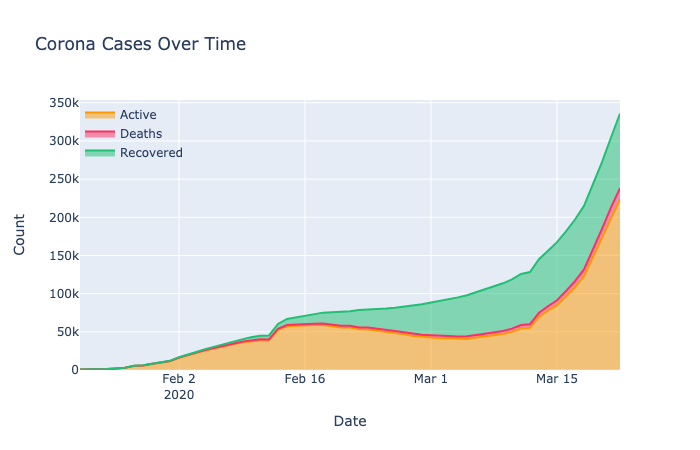

In [19]:
temp = df.groupby('Date')['Recovered', 'Deaths', 'Active'].sum().reset_index()
temp = temp.melt(id_vars="Date", value_vars=['Active', 'Deaths', 'Recovered'],
                 var_name='Case', value_name='Count')
temp.head()

fig = px.area(temp, x="Date", y="Count", color='Case',
             title='Corona Cases Over Time', color_discrete_sequence = [act, dth, rec],
             height=650, range_x=['01-01-2020', '17-03-2020'])

#fig.add_scatter(x=dax.Date, y=dax.Close)

fig.update_layout(
    legend=dict(
        x=0,
        y=1.0,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'
    ),
    legend_title=''
)

fig.show('png')

### DAX30 Performance Index

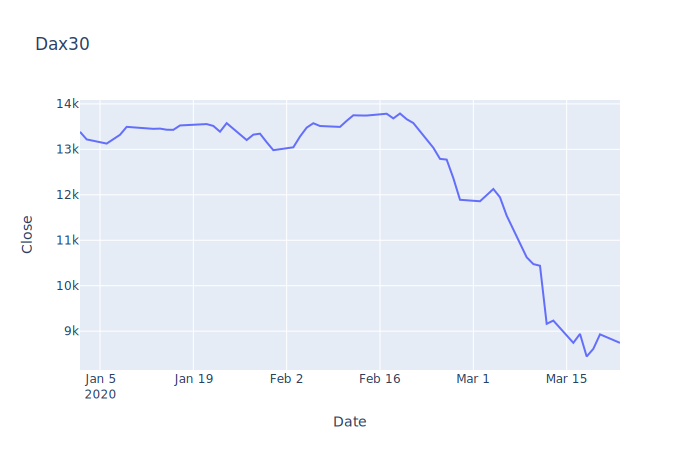

In [5]:
# Plot DAX Close values
fig = px.line(dax, x='Date', y='Close',
              title='Dax30')
fig.show('svg')

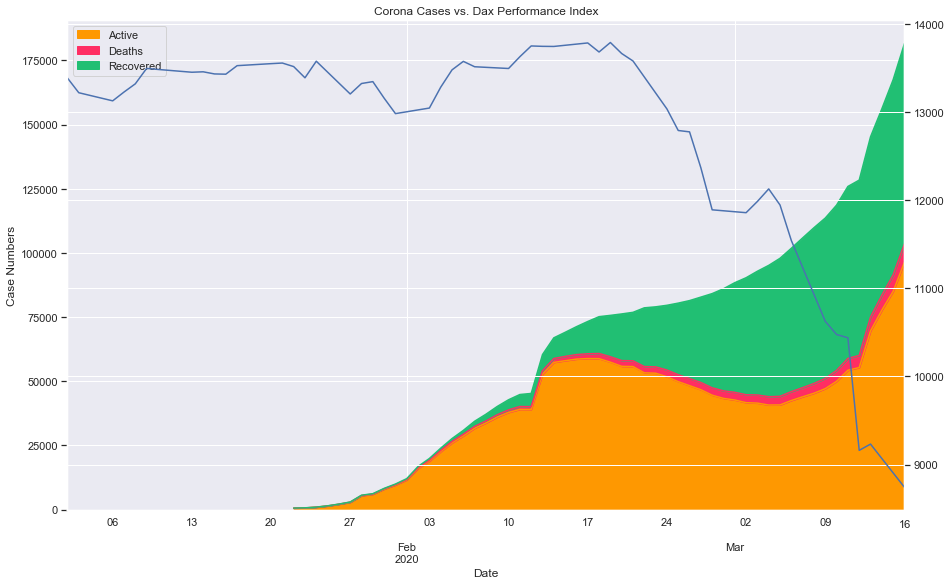

In [97]:
# Plot Corona cases together with DAX data
fig = plt.figure(figsize=(15,9))

ax1 = fig.add_subplot(111)
ax2 = ax1.twinx()

df.groupby("Date", as_index=False)[['Active', 'Deaths', 'Recovered']].sum().plot.area(x='Date', color=[act, dth, rec], ax=ax1)

dax.plot(x='Date', y='Adj Close', secondary_y=True, ax=ax2, legend=False)

ax2.set_ylabel('Dax 30')
ax1.set_ylabel('Case Numbers')


plt.title("Corona Cases vs. Dax Performance Index")
plt.show()

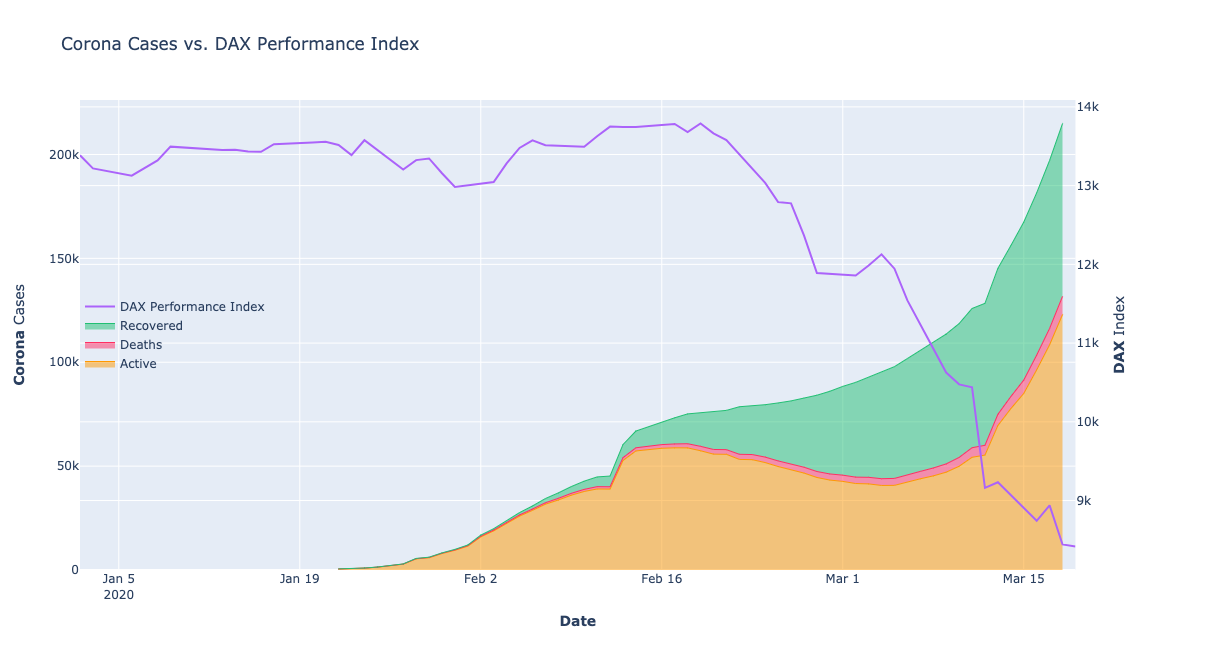

In [329]:
#fig = go.Figure()

grouped = df.groupby("Date", as_index=False).sum()
germany = df[df.Country=='Germany']

# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(go.Scatter(
    x=grouped.Date, y=grouped.Active,
    hoverinfo='x+y',
    mode='lines',
    name='Active',
    line=dict(width=1, color=act),
    stackgroup='one', # define stack group
),secondary_y=False,)

fig.add_trace(go.Scatter(
    x=grouped.Date, y=grouped.Deaths,
    hoverinfo='x+y',
    mode='lines',
    name='Deaths',
    line=dict(width=1, color=dth),
    stackgroup='one'
), secondary_y=False,)

fig.add_trace(go.Scatter(
    x=grouped.Date, y=grouped.Recovered,
    hoverinfo='x+y',
    mode='lines',
    name='Recovered',
    line=dict(width=1, color=rec),
    stackgroup='one'), secondary_y=False,)

fig.add_scatter(x=dax.Date, y=dax.Close, secondary_y=True, name='DAX Performance Index')

#fig.add_scatter(x=germany.Date, y=germany.Confirmed, secondary_y=False, name='Confirmed Cases in <b>Germany</b>')


fig.update_layout(height=650)

fig.update_layout(
    legend=dict(
        x=0,
        y=0.5,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'
    ),
    legend_title=''
)

# Set x-axis title
fig.update_xaxes(title_text="<b>Date</b>")

# Add figure title
fig.update_layout(
    title_text="Corona Cases vs. DAX Performance Index"
)

# Set y-axes titles
fig.update_yaxes(title_text="<b>DAX</b> Index", secondary_y=True)
fig.update_yaxes(title_text="<b>Corona</b> Cases", secondary_y=False)


fig.show('png')
fig.write_html("data/corona_vs_dax.html")

### DAX vs Germany Cases

In [41]:
# Create a DataFrame with only German cases
germany = df[df.Country=='Germany']

In [42]:
germany.head()

,Country/Region,Date,Confirmed,Deaths,Recovered,Country,Active,Population,ISO3_Code,Income,Confirmed_per_Cap,Deaths_per_Cap,Recovered_per_Cap,Active_per_Cap
63,Germany,2020-01-22,0,0,0,Germany,0,83.783945,DEU,High-income countries,0.0,0.0,0.0,0.0
234,Germany,2020-01-23,0,0,0,Germany,0,83.783945,DEU,High-income countries,0.0,0.0,0.0,0.0
405,Germany,2020-01-24,0,0,0,Germany,0,83.783945,DEU,High-income countries,0.0,0.0,0.0,0.0
576,Germany,2020-01-25,0,0,0,Germany,0,83.783945,DEU,High-income countries,0.0,0.0,0.0,0.0
747,Germany,2020-01-26,0,0,0,Germany,0,83.783945,DEU,High-income countries,0.0,0.0,0.0,0.0


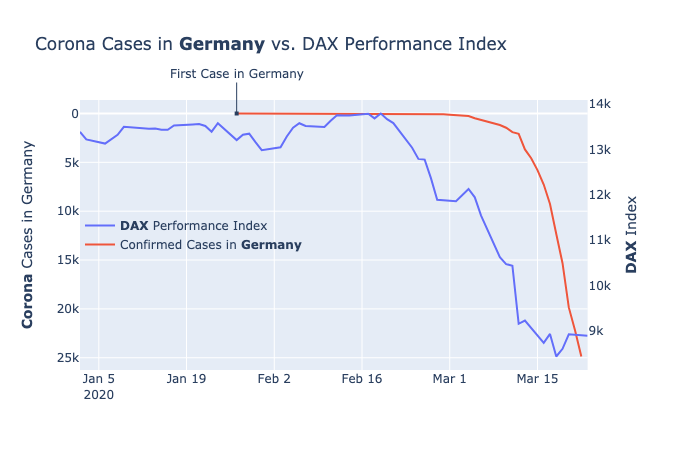

In [47]:
#fig = go.Figure()

germany = df[df.Country=='Germany']
germany = germany[germany.Confirmed > 0]


#world = df.groupby("Date", as_index=False).Confirmed.sum()

# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_scatter(x=dax.Date, y=dax.Close, secondary_y=True, name='<b>DAX</b> Performance Index')

fig.add_scatter(x=germany.Date, y=germany.Confirmed, secondary_y=False, name='Confirmed Cases in <b>Germany</b>')

#fig.add_scatter(x=world.Date, y=world.Confirmed, secondary_y=False, name='Confirmed Cases <b>Worldwide</b>')


fig.update_layout(height=650)

fig.update_layout(
    legend=dict(
        x=0,
        y=0.5,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'
    ),
    legend_title=''
)

# Set x-axis title
#fig.update_xaxes(title_text="<b>Date</b>")

# Add figure title
fig.update_layout(
    # title_text="Corona Cases in vs. Performance Indexes",
    title_text="Corona Cases in <b>Germany</b> vs. DAX Performance Index",
    annotations=[
        dict(
            x=germany.Date.iloc[0],
            y=germany.Confirmed.iloc[0],
            xref="x",
            yref="y",
            text="First Case\nin Germany",
            showarrow=True,
            arrowhead=7,
            ax=0,
            ay=-40
        )
    ]
)

# Update y-axes
fig.update_yaxes(title_text="<b>DAX</b> Index", secondary_y=True, showgrid=False)
fig.update_yaxes(title_text="<b>Corona</b> Cases in Germany", autorange="reversed", secondary_y=False)

fig.show('png')
fig.write_html("data/corona_vs_dax.html")

In [12]:
germany.to_excel('data/pt/germany.xlsx')
dax.to_excel('data/pt/dax.xlsx')

In [48]:
# Select columns
cols = ['Date', 'Confirmed', 'Deaths', 'Recovered', 'Active', 'Confirmed_per_Cap','Deaths_per_Cap', 'Recovered_per_Cap']

# If dates do not match, delete the last row from DAX
if germany.Date.max() < dax.Date.max():
    dax = dax.iloc[:-1]
    
# Merge COVID data with DAX "Close" values
ger_dax = germany[cols].merge(dax[['Date', 'Close']],on='Date', how='outer').sort_values('Date').ffill().fillna(0).rename(columns={'Close':"DAX_Close"})
ger_dax.head()

,Date,Confirmed,Deaths,Recovered,Active,Confirmed_per_Cap,Deaths_per_Cap,Recovered_per_Cap,DAX_Close
56,2020-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13385.93
57,2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13219.14
58,2020-01-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13126.99
59,2020-01-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13226.83
60,2020-01-08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13320.18


In [49]:
ger_dax.to_excel('data/pt/germany_dax.xlsx')

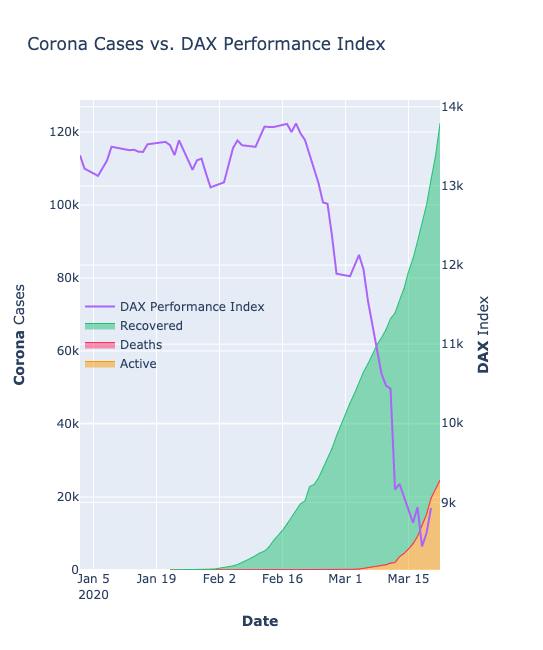

In [50]:
#fig = go.Figure()

grouped = df.groupby("Date", as_index=False).sum()
germany = df[df.Country=='Germany']

# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(go.Scatter(
    x=germany.Date, y=germany.Active,
    hoverinfo='x+y',
    mode='lines',
    name='Active',
    line=dict(width=1, color=act),
    stackgroup='one', # define stack group
),secondary_y=False,)

fig.add_trace(go.Scatter(
    x=germany.Date, y=germany.Deaths,
    hoverinfo='x+y',
    mode='lines',
    name='Deaths',
    line=dict(width=1, color=dth),
    stackgroup='one'
), secondary_y=False,)

fig.add_trace(go.Scatter(
    x=germany.Date, y=grouped.Recovered,
    hoverinfo='x+y',
    mode='lines',
    name='Recovered',
    line=dict(width=1, color=rec),
    stackgroup='one'), secondary_y=False,)

fig.add_scatter(x=dax.Date, y=dax.Close, secondary_y=True, name='DAX Performance Index')


fig.update_layout(height=650)

fig.update_layout(
    legend=dict(
        x=0,
        y=0.5,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'
    ),
    legend_title=''
)

# Set x-axis title
fig.update_xaxes(title_text="<b>Date</b>")

# Add figure title
fig.update_layout(
    title_text="Corona Cases vs. DAX Performance Index"
)

# Set y-axes titles
fig.update_yaxes(title_text="<b>DAX</b> Index", secondary_y=True)
fig.update_yaxes(title_text="<b>Corona</b> Cases", secondary_y=False)


fig.show()
fig.write_html("data/corona_vs_dax.html")

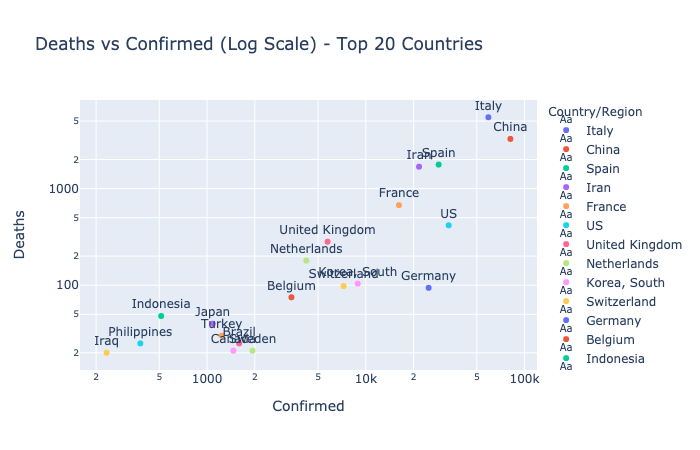

In [6]:
# Plot Deaths vs Confirmed in log_scale
current = df[df.Date == df.Date.max()].reset_index(drop=True)
fig = px.scatter(current.sort_values('Deaths', ascending=False).iloc[:20, :], 
                 x='Confirmed', y='Deaths', color='Country/Region', height=650,
                 text='Country/Region', log_x=True, log_y=True, 
                 title='Deaths vs Confirmed (Log Scale) - Top 20 Countries')
fig.update_traces(textposition='top center')
fig.show('png')

### Active per Cap

In [45]:
# Read links to country flags
flags = pd.read_excel("data/flourish/flags.xlsx")

In [46]:
flags.head()

,country,region,link
0,Afghanistan,Asia,https://www.countryflags.io/af/flat/64.png
1,Albania,Europe,https://www.countryflags.io/al/flat/64.png
2,Algeria,Africa,https://www.countryflags.io/dz/flat/64.png
3,American Samoa,Oceania,https://www.countryflags.io/as/flat/64.png
4,Andorra,Europe,https://www.countryflags.io/ad/flat/64.png


In [65]:
# Create a Active_per_Cap timeseries
apc = df.pivot(index='Country/Region', columns='Date', values="Active_per_Cap").reset_index()

In [66]:
apc.head()

Date,Country/Region,2020-01-22 00:00:00,2020-01-23 00:00:00,2020-01-24 00:00:00,2020-01-25 00:00:00,2020-01-26 00:00:00,2020-01-27 00:00:00,2020-01-28 00:00:00,2020-01-29 00:00:00,2020-01-30 00:00:00,...,2020-03-11 00:00:00,2020-03-12 00:00:00,2020-03-13 00:00:00,2020-03-14 00:00:00,2020-03-15 00:00:00,2020-03-16 00:00:00,2020-03-17 00:00:00,2020-03-18 00:00:00,2020-03-19 00:00:00,2020-03-20 00:00:00
0,Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.179818,0.179818,0.179818,0.282570,0.411012,0.513765,0.539453,0.539453,0.539453,0.590829
1,Albania,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.822364,7.644729,11.119605,12.857044,14.246994,17.374383,18.764334,19.806797,21.544235,23.629161
2,Algeria,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.456089,0.342067,0.364872,0.501698,0.729743,0.866570,1.003397,1.254246,1.049006,1.071810
3,Andorra,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,12.942471,0.000000,12.942471,0.000000,0.000000,12.942471,491.813887,491.813887,673.008477,957.742833
4,Angola,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.030426


In [67]:
# Add flags column
merged = apc.merge(flags, left_on='Country/Region', right_on='country', how='left')

In [68]:
merged.head()

,Country/Region,2020-01-22 00:00:00,2020-01-23 00:00:00,2020-01-24 00:00:00,2020-01-25 00:00:00,2020-01-26 00:00:00,2020-01-27 00:00:00,2020-01-28 00:00:00,2020-01-29 00:00:00,2020-01-30 00:00:00,...,2020-03-14 00:00:00,2020-03-15 00:00:00,2020-03-16 00:00:00,2020-03-17 00:00:00,2020-03-18 00:00:00,2020-03-19 00:00:00,2020-03-20 00:00:00,country,region,link
0,Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.282570,0.411012,0.513765,0.539453,0.539453,0.539453,0.590829,Afghanistan,Asia,https://www.countryflags.io/af/flat/64.png
1,Albania,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,12.857044,14.246994,17.374383,18.764334,19.806797,21.544235,23.629161,Albania,Europe,https://www.countryflags.io/al/flat/64.png
2,Algeria,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.501698,0.729743,0.866570,1.003397,1.254246,1.049006,1.071810,Algeria,Africa,https://www.countryflags.io/dz/flat/64.png
3,Andorra,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,12.942471,491.813887,491.813887,673.008477,957.742833,Andorra,Europe,https://www.countryflags.io/ad/flat/64.png
4,Angola,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.030426,Angola,Africa,https://www.countryflags.io/ao/flat/64.png


In [70]:
merged.to_excel("data/flourish/active_per_cap.xlsx")